In [5]:
from openpyxl import load_workbook
from openpyxl.utils.cell import coordinate_from_string, column_index_from_string, get_column_letter
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

from filtering import *
from loading import *

PATHS = ['SAMPLES\zz_lista_volontera_22_23.xlsx', 'SAMPLES\zz_lista_volontera_23_24.xlsx', 'SAMPLES\zz_lista_volontera_24_25.xlsx']
LAST_DATES = ["18.12.2022.", "18.12.2025.", "18.12.2024."]

dfs = []

for i in range(len(PATHS)):

    year_df = load_year(PATHS[i])
    year_df = remove_non_wanted_dates(year_df, LAST_DATES[i])
        
    year_df = year_df.sort_values(by='volunteer_dates', key=lambda x: x.apply(len), ascending=False)
    year_df = year_df.reset_index(drop=True)
        
    year_df['volunteer_count'] = year_df['volunteer_dates'].apply(len)
    
    dfs.append(year_df)
    
display(dfs[1].head(10))

<>:11: SyntaxWarning: invalid escape sequence '\z'
<>:11: SyntaxWarning: invalid escape sequence '\z'
<>:11: SyntaxWarning: invalid escape sequence '\z'
<>:11: SyntaxWarning: invalid escape sequence '\z'
<>:11: SyntaxWarning: invalid escape sequence '\z'
<>:11: SyntaxWarning: invalid escape sequence '\z'
C:\Users\Lobel\AppData\Local\Temp\ipykernel_35376\3578698414.py:11: SyntaxWarning: invalid escape sequence '\z'
  PATHS = ['SAMPLES\zz_lista_volontera_22_23.xlsx', 'SAMPLES\zz_lista_volontera_23_24.xlsx', 'SAMPLES\zz_lista_volontera_24_25.xlsx']
C:\Users\Lobel\AppData\Local\Temp\ipykernel_35376\3578698414.py:11: SyntaxWarning: invalid escape sequence '\z'
  PATHS = ['SAMPLES\zz_lista_volontera_22_23.xlsx', 'SAMPLES\zz_lista_volontera_23_24.xlsx', 'SAMPLES\zz_lista_volontera_24_25.xlsx']
C:\Users\Lobel\AppData\Local\Temp\ipykernel_35376\3578698414.py:11: SyntaxWarning: invalid escape sequence '\z'
  PATHS = ['SAMPLES\zz_lista_volontera_22_23.xlsx', 'SAMPLES\zz_lista_volontera_23_24.xlsx

,volunteer_name,volunteer_dates,volunteer_class,volunteer_school,volunteer_count
0,Rita Bakić,"[(Peščenica, 05.10.2023.), (Peščenica, 19.10.2...",2. razred,XV.,41
1,Borna Planinić,"[(Trešnjevka, 12.12.2023.), (Trešnjevka, 19.12...",1. razred,PŠVP,35
2,Luka Šipek,"[(Peščenica, 14.3.2024.), (Peščenica, 9.4.2024...",2. razred,XV.,32
3,Nika Milinković,"[(Peščenica, 3.10.2023.), (Peščenica, 05.10.20...",2. razred,XV.,31
4,Pavla Žaja,"[(Peščenica, 3.10.2023.), (Peščenica, 10.10.20...",2. razred,XV.,29
5,Jakov Kifer,"[(Trešnjevka, 12.12.2023.), (Trešnjevka, 09.01...",1. razred,PŠVP,28
6,Anja Vukobratović,"[(Trešnjevka, 05.10.2023.), (Trešnjevka, 12.10...",2. razred,XV.,20
7,Frane Baletić,"[(Peščenica, 3.10.2023.), (Peščenica, 05.10.20...",4. razred,XV.,19
8,Mauro Kritovac,"[(Trešnjevka, 03.10.2023.), (Trešnjevka, 17.10...",2. razred,XV.,18
9,Sven Biban,"[(Peščenica, 4.1.2024.), (Trešnjevka, 21.11.20...",2. razred,KG,18


In [4]:
# Per location, number of hours

prijavljeni_volonteri = pd.DataFrame({
    'Lokacija': ['Peščenica', 'Trešnjevka', 'Špansko'],
    'Prosječna dolaznost': [8.95, 4.5, 7.0]
})
prijavljeni_volonteri = prijavljeni_volonteri.sort_values(by='Prosječna dolaznost', ascending=True)

plt.figure(figsize=(6, 6), dpi=800)
plt.bar(prijavljeni_volonteri['Lokacija'], prijavljeni_volonteri['Prosječna dolaznost'], color=['skyblue', 'orange', 'green'])

# Add title and labels
plt.title('Prosječna dolaznost u prvom polugodištu', fontsize=16, weight='bold', pad=20)
plt.xlabel('Prosječna dolaznost', fontsize=14, labelpad=15)
plt.ylabel('Lokacija', fontsize=14, labelpad=15)

# Adjust layout to make room for labels
plt.tight_layout()

# Save the figure with 800 DPI before showing it
fig = plt.gcf()
fig.savefig('./REZULTATI/prosjecna_dolaznost_24_25.png', dpi=800)

# Display the plot
plt.show()

KeyboardInterrupt: 

In [3]:
# For getting the total number of volunteers at a specific location

df = dfs[1]

# Flatten the 'dates' column
df_flattened = df.explode('volunteer_dates')

# Split the 'dates' tuple into separate columns (location and date)
df_flattened[['location', 'date']] = pd.DataFrame(df_flattened['volunteer_dates'].to_list(), index=df_flattened.index)

# Filter by a specific location (e.g., 'Location 1')
location_to_check = 'Trešnjevka'
df_flattened = df_flattened[df_flattened['location'] == location_to_check]

df_flattened['date'] = df_flattened['volunteer_dates'].apply(lambda x: x[1] if isinstance(x, tuple) and len(x) > 1 else None)
unique_dates = df_flattened['date'].nunique()

# display(df_flattened)
print(unique_dates)
print(f"Total volunteering at {location_to_check}: {volunteering_count}")

60


NameError: name 'volunteering_count' is not defined

<Figure size 8000x4800 with 0 Axes>

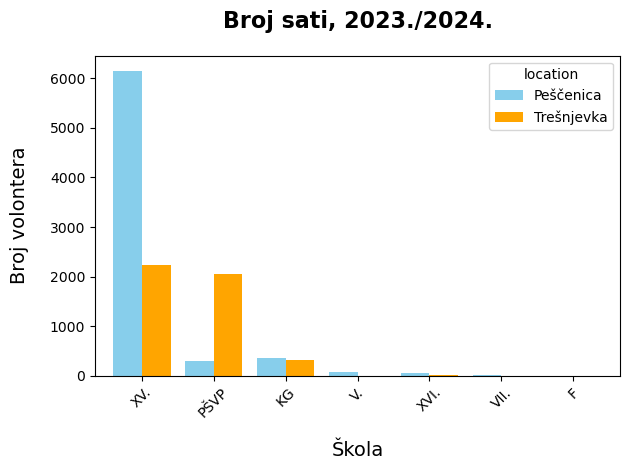

location          Peščenica  Trešnjevka
volunteer_school                       
XV.                  6149.0      2225.0
PŠVP                  289.0      2045.0
KG                    346.0       306.0
V.                     64.0         NaN
XVI.                   47.0         8.0
VII.                   16.0         NaN
F                       1.0         NaN


In [6]:
# Plot the distribution of schools at the filtered location

year_df = dfs[1]

# Flatten the 'dates' column to extract the location
year_df = year_df.explode('volunteer_dates')
year_df[['location', 'date']] = pd.DataFrame(year_df['volunteer_dates'].to_list(), index=year_df.index)

# Group by 'volunteer_school', 'location' and sum 'volunteer_count'
school_location_hours = year_df.groupby(['volunteer_school', 'location'])['volunteer_count'].sum().reset_index()

# Pivot the DataFrame so that each location becomes a separate column
school_location_hours_pivot = school_location_hours.pivot(index='volunteer_school', columns='location', values='volunteer_count')

# Sort by the total volunteer count (sum across locations) to arrange the bars in descending order
school_location_hours_pivot['Total'] = school_location_hours_pivot.sum(axis=1)
school_location_hours_pivot = school_location_hours_pivot.sort_values(by='Total', ascending=False)

# Drop the 'Total' column used for sorting
school_location_hours_pivot = school_location_hours_pivot.drop(columns='Total')

# Plotting
plt.figure(figsize=(10, 6), dpi=800)

# Plot the bars for each location
school_location_hours_pivot.plot(kind='bar', stacked=False, color=['skyblue', 'orange', 'green'], width=0.8)

# Add title and labels
plt.title('Broj sati, 2023./2024.', fontsize=16, weight='bold', pad=20)
plt.xlabel('Škola', fontsize=14, labelpad=15)
plt.ylabel('Broj volontera', fontsize=14, labelpad=15)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to make room for rotated labels
plt.tight_layout()  # Adjust layout to fit labels properly

# Save the figure with 800 DPI before showing it
fig = plt.gcf()  # Get the current figure
fig.savefig('./REZULTATI/sati_po_skoli-graf-23_24_full.png', dpi=800)

# Display the plot
plt.show()

# Print the data for reference
print(school_location_hours_pivot)

In [ ]:
# Percentage of non-active volunteers

non_active = year_df[year_df['volunteer_count'] == 0]

percentage_non_active = len(non_active) / len(year_df) * 100

# Plot the percentage of non-active volunteers
plt.figure(figsize=(6, 6), dpi=800)
plt.pie([100 - percentage_non_active, percentage_non_active], labels=['Aktivni', 'Neaktivni'], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90)

# Add title
plt.title('Neaktivni, polugodište 2022./2023.', fontsize=20, weight='bold', pad=20)
plt.tight_layout()
# Save the figure with 800 DPI before showing it
fig = plt.gcf()
fig.savefig('./REZULTATI/neaktivnih/percentage_non_active_volunteers-22_23.png', dpi=800)

# Display the plot
plt.show()

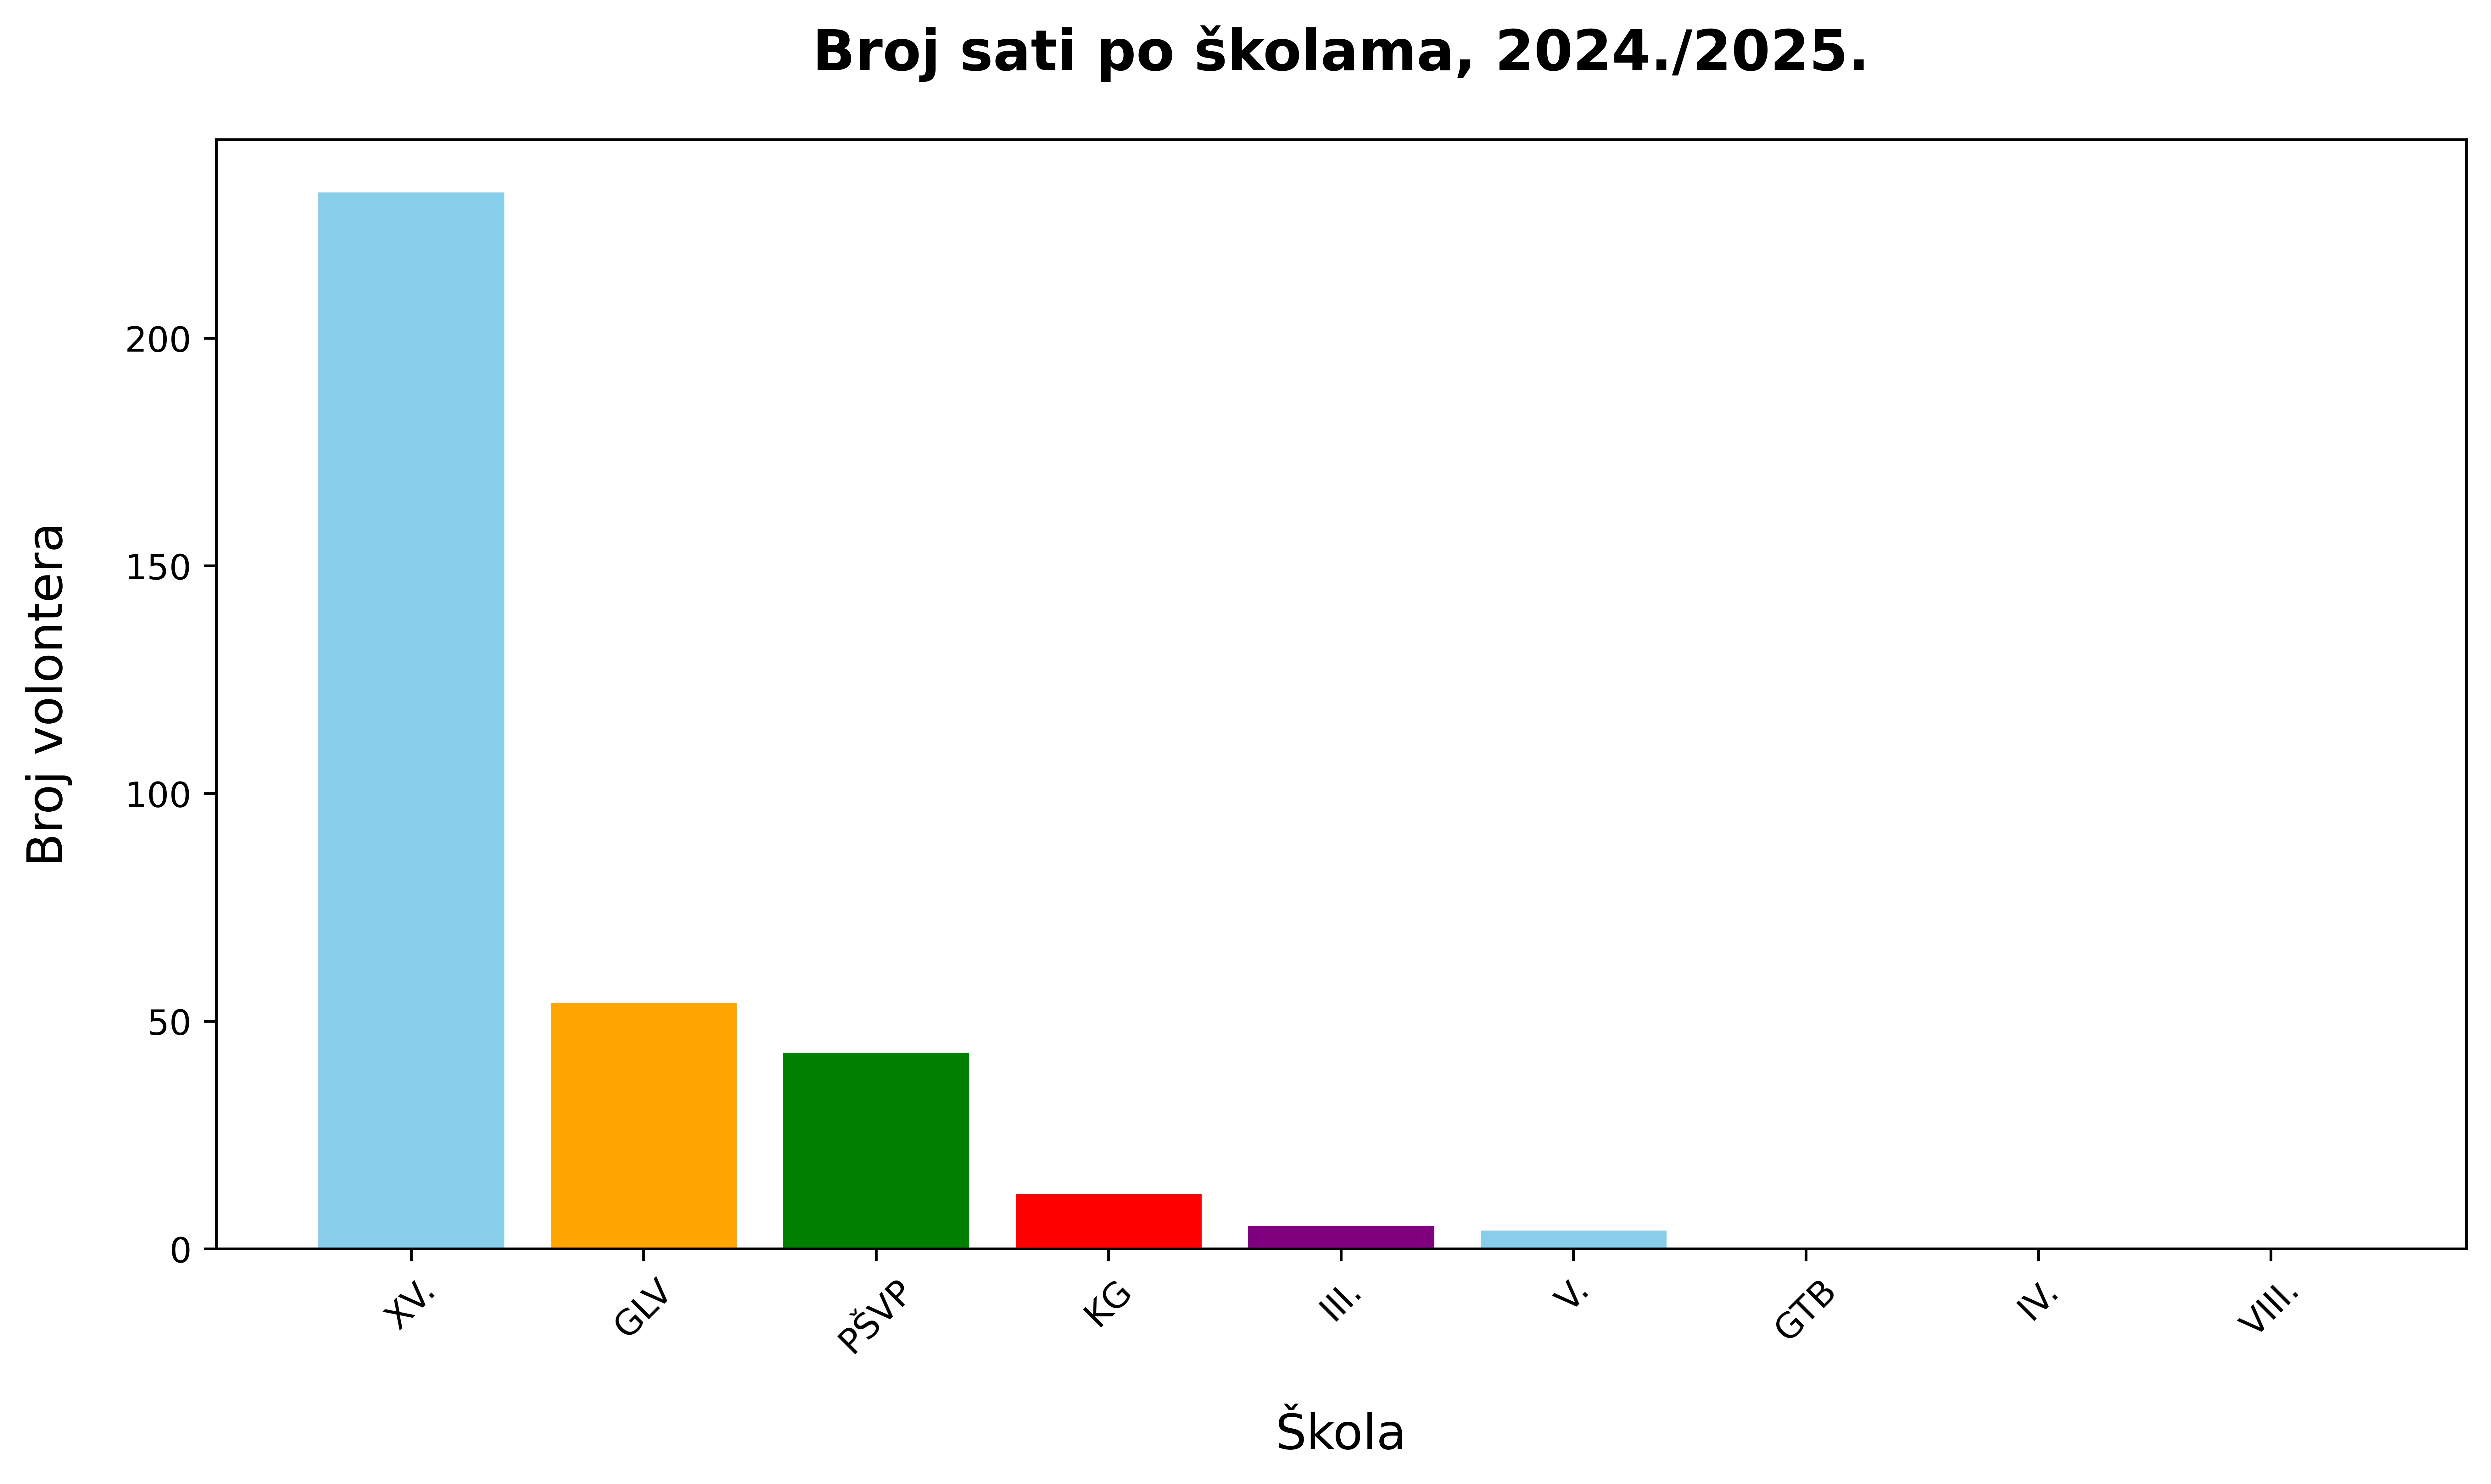

   Škola  Broj sati
0    XV.        232
1    GLV         54
2   PŠVP         43
3     KG         12
4   III.          5
5     V.          4
6    GTB          0
7    IV.          0
8  VIII.          0


In [ ]:
# Number of hours per school
year_df = dfs[2]


school_hours = year_df.groupby('volunteer_school')['volunteer_count'].sum().reset_index()
school_hours = school_hours.sort_values(by='volunteer_count', ascending=False)
school_hours.columns = ['Škola', 'Broj sati']
school_hours = school_hours.reset_index(drop=True)

# Assuming you already have 'school_hours' DataFrame
plt.figure(figsize=(10, 6), dpi=800)  # Set the DPI to 800 for both display and saving
plt.bar(school_hours['Škola'], school_hours['Broj sati'], color=['skyblue', 'orange', 'green', 'red', 'purple'])

# Add title and labels
plt.title('Broj sati po školama, 2024./2025.', fontsize=16, weight='bold', pad=20)
plt.xlabel('Škola', fontsize=14, labelpad=15)
plt.ylabel('Broj volontera', fontsize=14, labelpad=15)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to make room for rotated labels
plt.tight_layout()  # Adjust layout to fit labels properly

# Save the figure with 800 DPI before showing it
fig = plt.gcf()  # Get the current figure
fig.savefig('./REZULTATI/sati_po_skol/sati_po_skoli-graf-22_23.png', dpi=800)

# Display the plot
plt.show()

print(school_hours)

In [ ]:
# Number of hours

prijavljeni_volonteri = pd.DataFrame({
    'Godina': ['2024./2025.', '2023./2024.', '2022./2023.'],
    'Broj sati': [350, 255, 212]
})
prijavljeni_volonteri = prijavljeni_volonteri.sort_values(by='Broj sati', ascending=True)

plt.figure(figsize=(6, 6), dpi=800)
plt.bar(prijavljeni_volonteri['Godina'], prijavljeni_volonteri['Broj sati'], color=['skyblue', 'orange', 'green'])

# Add title and labels
plt.title('Broj sati u prvom polugodištu', fontsize=16, weight='bold', pad=20)
plt.xlabel('Broj sati', fontsize=14, labelpad=15)
plt.ylabel('Godina', fontsize=14, labelpad=15)

# Adjust layout to make room for labels
plt.tight_layout()

# Save the figure with 800 DPI before showing it
fig = plt.gcf()
fig.savefig('./REZULTATI/sati_po_godinama.png', dpi=800)

# Display the plot
plt.show()

In [ ]:
# Number of registered volunteers

prijavljeni_volonteri = pd.DataFrame({
    'Godina': ['2024./2025.', '2023./2024.', '2022./2023.'],
    'Broj volontera': [176, 127, 98]
})
prijavljeni_volonteri = prijavljeni_volonteri.sort_values(by='Broj volontera', ascending=True)

plt.figure(figsize=(6, 6), dpi=800)
plt.bar(prijavljeni_volonteri['Godina'], prijavljeni_volonteri['Broj volontera'], color=['skyblue', 'orange', 'green'])

# Add title and labels
plt.title('Broj prijavljenih u prvom polugodištu', fontsize=16, weight='bold', pad=20)
plt.xlabel('Broj volontera', fontsize=14, labelpad=15)
plt.ylabel('Godina', fontsize=14, labelpad=15)

# Adjust layout to make room for labels
plt.tight_layout()

# Save the figure with 800 DPI before showing it
fig = plt.gcf()
fig.savefig('./REZULTATI/prijavljenih_po_godinama.png', dpi=800)

# Display the plot
plt.show()

In [ ]:
# Per hour, all three dataframes

volunteers_per_hour1 = dfs[2].value_counts('volunteer_count').sort_index()
volunteers_per_hour2 = dfs[1].value_counts('volunteer_count').sort_index()
volunteers_per_hour3 = dfs[0].value_counts('volunteer_count').sort_index()

volunteers_per_hour1 = volunteers_per_hour1.reindex(volunteers_per_hour1.index.union(volunteers_per_hour2.index).union(volunteers_per_hour3.index), fill_value=0)
volunteers_per_hour2 = volunteers_per_hour2.reindex(volunteers_per_hour1.index, fill_value=0)
volunteers_per_hour3 = volunteers_per_hour3.reindex(volunteers_per_hour1.index, fill_value=0)

# Define width of each bar
bar_width = 0.25

# Define positions for each set of bars (the x-ticks)
x = np.arange(len(volunteers_per_hour1))

# Plot all three sets of bars
fig, ax = plt.subplots(figsize=(12, 6))

# Bar for the first dataframe
ax.bar(x - bar_width, volunteers_per_hour1, width=bar_width, color=plt.cm.Blues(np.linspace(0.4, 0.7, len(volunteers_per_hour1))), label='DataFrame 1')

# Bar for the second dataframe
ax.bar(x, volunteers_per_hour2, width=bar_width, color=plt.cm.Greens(np.linspace(0.4, 0.7, len(volunteers_per_hour2))), label='DataFrame 2')

# Bar for the third dataframe
ax.bar(x + bar_width, volunteers_per_hour3, width=bar_width, color=plt.cm.Reds(np.linspace(0.4, 0.7, len(volunteers_per_hour3))), label='DataFrame 3')

# Add title and labels
ax.set_title('Broj volontera po broju sati', fontsize=16, weight='bold', pad=20)
ax.set_xlabel('Broj sati', fontsize=14, labelpad=15)
ax.set_ylabel('Broj volontera', fontsize=14, labelpad=15)

# Set x-ticks to the positions of the bars
ax.set_xticks(x)
ax.set_xticklabels(volunteers_per_hour1.index, rotation=45)

# Add a legend
ax.legend()

# Adjust layout to make room for rotated labels
plt.tight_layout()

# Rename the items in the legend
ax.legend(['2024./2025.', '2023./2024.', '2022./2023.'])
fig.savefig('./REZULTATI/volonteri_po_sati', dpi=800)

# Display the plot
plt.show()

In [ ]:
# Plot the number of volunteers per hour

year_df = dfs[0]

volunteers_per_hour = year_df['volunteer_count'].value_counts()
volunteers_per_hour = volunteers_per_hour.sort_index()

volunteers_per_hour.plot(kind='bar', figsize=(10, 6), color=plt.cm.Blues(np.linspace(0.7, 0.1, len(volunteers_per_hour))))

# Add title and labels
plt.title('Broj volontera po broju sati, polugodište 2022./2023.', fontsize=16, weight='bold', pad=20)
plt.xlabel('Broj sati', fontsize=14, labelpad=15)
plt.ylabel('Broj volontera', fontsize=14, labelpad=15)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to make room for rotated labels
plt.tight_layout()  # Adjust layout to fit labels properly

# Save the figure with 800 DPI before showing it
fig = plt.gcf()  # Get the current figure
fig.savefig('./REZULTATI/volonteri_po_satima/volonteri_po_sati-graf-22_23.png', dpi=800)

# Display the plot
plt.show()

In [ ]:
# Table for best volunteers

# Create the plot and remove axes
fig, ax = plt.subplots(figsize=(10, 3))
fig.set_dpi(800)
ax.axis('tight')
ax.axis('off')

# Create the title
plt.title("Prvo polugodište 2024./2025.", fontsize=20, weight='bold', color='black', pad=30)  # Adjust pad for less space

top_df = year_df.head(10)

# Create the table
table_data = top_df[['volunteer_name', 'volunteer_class', 'volunteer_school', 'volunteer_count']].values
table_data = table_data
column_labels = ['Ime', 'Razred', 'Škola', 'Broj sati']

# Create the table with better styling
table = ax.table(cellText=table_data, colLabels=column_labels, loc='center', cellLoc='center', colColours=['#f7f7f7']*4)

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Highlight the header
for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_fontsize(14)
        cell.set_text_props(weight='bold')
        cell.set_facecolor('#007acc')  # Header background color
        cell.set_text_props(color='white')  # Header text color
    else:
        cell.set_edgecolor('gray')
        cell.set_facecolor('#ffffff')

# Adjust layout and display the table with reduced space
plt.subplots_adjust(left=0.1, right=0.9, top=1.5, bottom=0.2)  # Adjust the top and bottom space
plt.show()

# Save the figure
fig.savefig('./REZULTATI/naj_volonteri/naj_volonteri-prvo_polugodiste-24_25.png', bbox_inches='tight', dpi=800)

In [ ]:
# Number of registered volunteers per school

from numpy import pad

school_counts = year_df.groupby('volunteer_school').size().reset_index(name='school_count')
school_counts = school_counts.sort_values(by='school_count', ascending=False)
school_counts.columns = ['Škola', 'Broj volontera']
school_counts = school_counts.reset_index(drop=True)



# Assuming you already have 'school_counts' DataFrame
plt.figure(figsize=(10, 6), dpi=800)  # Set the DPI to 800 for both display and saving
plt.bar(school_counts['Škola'], school_counts['Broj volontera'], color=['skyblue', 'orange', 'green', 'red', 'purple'])

# Add title and labels
plt.title('Broj volontera po školama, polugodište 2024./2025.', fontsize=16, weight='bold', pad=20)
plt.xlabel('Škola', fontsize=14, labelpad=15)
plt.ylabel('Broj volontera', fontsize=14, labelpad=15)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to make room for rotated labels
plt.tight_layout()  # Adjust layout to fit labels properly

# Save the figure with 800 DPI before showing it
fig = plt.gcf()  # Get the current figure
fig.savefig('./REZULTATI/prijav_po_skol/prijavljenih_po_skoli-graf-24_25.png', dpi=800)

# Display the plot
plt.show()